In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [2]:
retail= pd.read_csv("OnlineRetail.csv", encoding="latin-1", parse_dates=['InvoiceDate'])
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
retail.info()  

#Missing Values in customer id and Description columns
#Missing Discription can be handled by getting rid of noisy data first
#Customer Id is needed for understanding customer behaviours and segment them accordingly
#We won't delete them right away as they're needed for other analysis but when analyzing 
#Customer behaviour we will remove these rows with missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
retail[retail['UnitPrice'] <= 0] # Error Values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [6]:
retail = retail[retail['UnitPrice'] > 0]

In [7]:
retail.drop_duplicates(inplace = True)

In [8]:
retail.isna().sum()
# missing data is only in the customer id now

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132565
Country             0
dtype: int64

In [9]:
cancellations = retail['InvoiceNo'].str.startswith('C')
retail[cancellations]
# Remove the "C" at the beginning of the cancelled invoices
retail.loc[cancellations, 'InvoiceNo'] = retail.loc[cancellations, 'InvoiceNo'].str.replace('^C', '', regex=True)

In [10]:
retail['Returned'] = 0
retail.loc[retail['Quantity'] < 0, 'Returned'] = 1  # Update 'Returned' to 1 where 'Quantity' < 0
retail.Returned.value_counts()

Returned
0    524878
1      9251
Name: count, dtype: int64

In [11]:
retail.insert(6,"Total Price",value= retail["Quantity"]*retail["UnitPrice"])

In [12]:
retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Total Price,CustomerID,Country,Returned
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.3,17850.0,United Kingdom,0


In [13]:
retail["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [14]:
retail['Country'] = retail['Country'].replace({"EIRE": "Ireland", "RSA": "South Africa","Israel": "Occupied Palestine"})

In [15]:
#Top 10 products by sale volume
retail.groupby('Description')["Quantity"].sum().sort_values(ascending=False).head(10)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47256
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35294
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26095
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64

In [16]:
#Top 10 products by revenue 
retail.groupby('Description')["Total Price"].sum().sort_values(ascending=False).head(10)

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164459.49
WHITE HANGING HEART T-LIGHT HOLDER     99612.42
PARTY BUNTING                          98243.88
JUMBO BAG RED RETROSPOT                92175.79
RABBIT NIGHT LIGHT                     66661.63
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63715.24
ASSORTED COLOUR BIRD ORNAMENT          58792.42
CHILLI LIGHTS                          53746.66
Name: Total Price, dtype: float64

In [17]:
retail["month"] = retail["InvoiceDate"].dt.month
retail["hour"]= retail["InvoiceDate"].dt.hour
retail['day']= retail['InvoiceDate'].dt.day
retail['day_of_the_week']= retail['InvoiceDate'].dt.day_of_week
retail['year']= retail['InvoiceDate'].dt.year

retail['InvoiceDate'] = retail['InvoiceDate'].dt.date

In [18]:
#Sales per month
retail.groupby('month')["Total Price"].sum().sort_values(ascending=False).head(10)#.plot(kind='bar')

month
11    1456145.800
12    1179424.670
10    1069368.230
9     1017596.682
5      722094.100
8      703510.580
6      689977.230
3      682013.980
7      680156.991
1      558448.560
Name: Total Price, dtype: float64

In [19]:
#best time to advertise is afternoon
retail['hour'].value_counts()#.plot(kind='bar')

hour
12    77322
15    76558
13    71052
14    66065
11    56608
16    53906
10    48602
9     34208
17    28136
8      8899
18     7886
19     3616
20      847
7       383
6        41
Name: count, dtype: int64

In [20]:
#Top 10 countries by revenue 
retail.groupby('Country')["Total Price"].sum().sort_values(ascending=False).head(10)


Country
United Kingdom    8189252.304
Netherlands        284661.540
Ireland            262993.380
Germany            221509.470
France             197317.110
Australia          137009.770
Switzerland         56363.050
Spain               54756.030
Belgium             40910.960
Sweden              36585.410
Name: Total Price, dtype: float64

Mean Squared Error: 30672540.437229376
R² Score: 0.8846451344473061


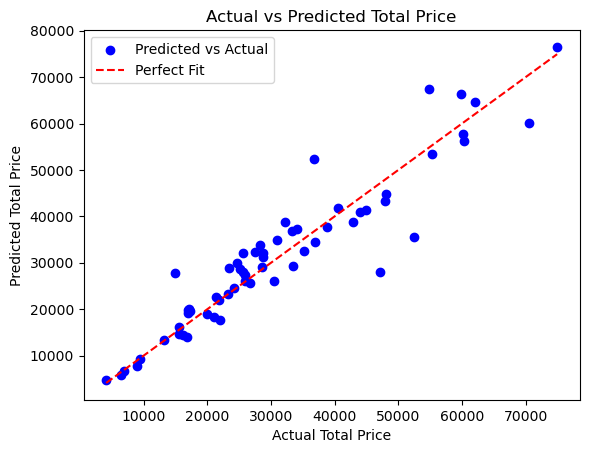

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#sales per day
day = retail.groupby(["InvoiceDate"]).agg({
    'day_of_the_week': 'first',
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'CustomerID': 'count',
    'Total Price': 'sum'
})
day.rename(columns={'CustomerID': 'CustomerCount', "day_of_the_week":'WeekDay', "Quantity":'TotalQuantity',"UnitPrice":'AVG_UnitPrice'}, inplace=True)
day.head(5)

x = day.drop('Total Price', axis=1)
y= day['Total Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)


# Calculate predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')
plt.title('Actual vs Predicted Total Price')
plt.legend()
plt.show()


In [22]:

# Group by InvoiceNo and list all products in a single order
df = retail
df['Grouped'] = df.groupby('InvoiceNo')['Description'].transform(lambda x: ','.join(x))
df = df[['InvoiceNo', 'Grouped']].drop_duplicates()

# Count the combinations
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Display the most common product combinations
count.most_common(10)

[(('KEY FOB ', 'KEY FOB '), 786),
 (('KEY FOB ', ' BACK DOOR '), 577),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 543),
 (('KEY FOB ', ' SHED'), 542),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  492),
 (('KEY FOB ', ' FRONT  DOOR '), 473),
 (('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG RED RETROSPOT'), 466),
 (('JUMBO BAG RED RETROSPOT', 'DOTCOM POSTAGE'), 461),
 (('JUMBO STORAGE BAG SUKI', 'JUMBO BAG RED RETROSPOT'), 456),
 (('COFFEE', 'SUGAR'), 452)]

In [23]:
# Calculting RFM to segment customers 
# RFM is short for:
# Recency: How recent was a customer's last purchase 
# Frequency: How often does the customer purchase
# Monetary: How much each cutomer spent

In [24]:
retail.CustomerID.nunique()

4371

In [25]:
retail.CustomerID.dropna(inplace=True)
customers = retail.groupby(["CustomerID", "InvoiceNo","InvoiceDate"])["Total Price"].sum()
customers = pd.DataFrame(customers)
customers.reset_index(inplace=True)

customers.head()

,CustomerID,InvoiceNo,InvoiceDate,Total Price
0,12346.0,541431,2011-01-18,77183.60
1,12346.0,541433,2011-01-18,-77183.60
2,12347.0,537626,2010-12-07,711.79
3,12347.0,542237,2011-01-26,475.39
4,12347.0,549222,2011-04-07,636.25


In [26]:
reference_date = customers['InvoiceDate'].max()  

rfm = customers.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                         # Frequency
    'Total Price': 'sum'                                      # Monetary
})
rfm = rfm[rfm['Total Price'] > 0] # Remove Customers Who returned what they bought

rfm.head()

,InvoiceDate,InvoiceNo,Total Price
CustomerID,,,
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40
12352.0,36,11,1545.41


In [27]:
rfm.rename(columns={"InvoiceDate" :'Recency',"InvoiceNo": 'Frequency',"Total Price": 'Monetary'}, inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40
12352.0,36,11,1545.41


In [28]:
# Define quantiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [29]:
rfm.sort_values(by="RFM_Score", ascending=False)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
15298.0,2,14,3774.10,5,5,5,555
14732.0,8,10,2686.34,5,5,5,555
14659.0,8,12,2456.53,5,5,5,555
14667.0,10,27,9165.04,5,5,5,555
12709.0,3,26,9264.10,5,5,5,555
...,...,...,...,...,...,...,...
15234.0,276,1,197.00,1,1,1,111
15226.0,310,1,154.41,1,1,1,111
15180.0,367,1,87.50,1,1,1,111


In [30]:
def segment_customer(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    
    if r >= 4 and f >= 4 and m >= 4:  # Champions: High Recency, Frequency, and Monetary scores. These are your best customers.
        return 'Champion'   
    
    elif r >= 4 and f >= 3:           # Loyal Customers: These customers purchase often and have a high Recency score, indicating they are currently active.
        return 'Loyal Customer'
    
    elif r >= 3 and f >= 3 and m >= 2:   # Potential Loyalists: These customers have a strong purchasing pattern but may not be as frequent or recent as Champions.
        return 'Potential Loyalist'
    
    elif r >= 4:                        # New Customers: High Recency score, but not yet frequent or high spenders.
        return 'New Customer'
    
    elif r >= 3 and f >= 2:     # Promising: Customers with potential, but they may need more engagement to become loyal.
        return 'Promising'
    
    elif r >= 2 and f <= 2:     # Customers Needing Attention: These customers are less engaged but may still have potential if re-engaged.
        return 'Customers Needing Attention'
    
    elif r <= 2 and f >= 2:     # At Risk: These customers have lower Recency scores and are at risk of churning.
        return 'At Risk'
    
    elif r <= 2 and f >= 4 and m >= 3:  # Can't Lose Them: High Frequency and Monetary scores, but low Recency. These are valuable customers that you need to re-engage.
        return 'Can\'t Lose Them'
    
    else:
        return 'Hibernating'        # Hibernating: These customers are inactive and have low scores across all metrics.
    
    



In [31]:

# Apply the segmentation function
rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm.Segment.value_counts()

Segment
At Risk                        958
Champion                       954
Customers Needing Attention    565
Loyal Customer                 475
Potential Loyalist             468
Hibernating                    355
New Customer                   330
Promising                      214
Name: count, dtype: int64

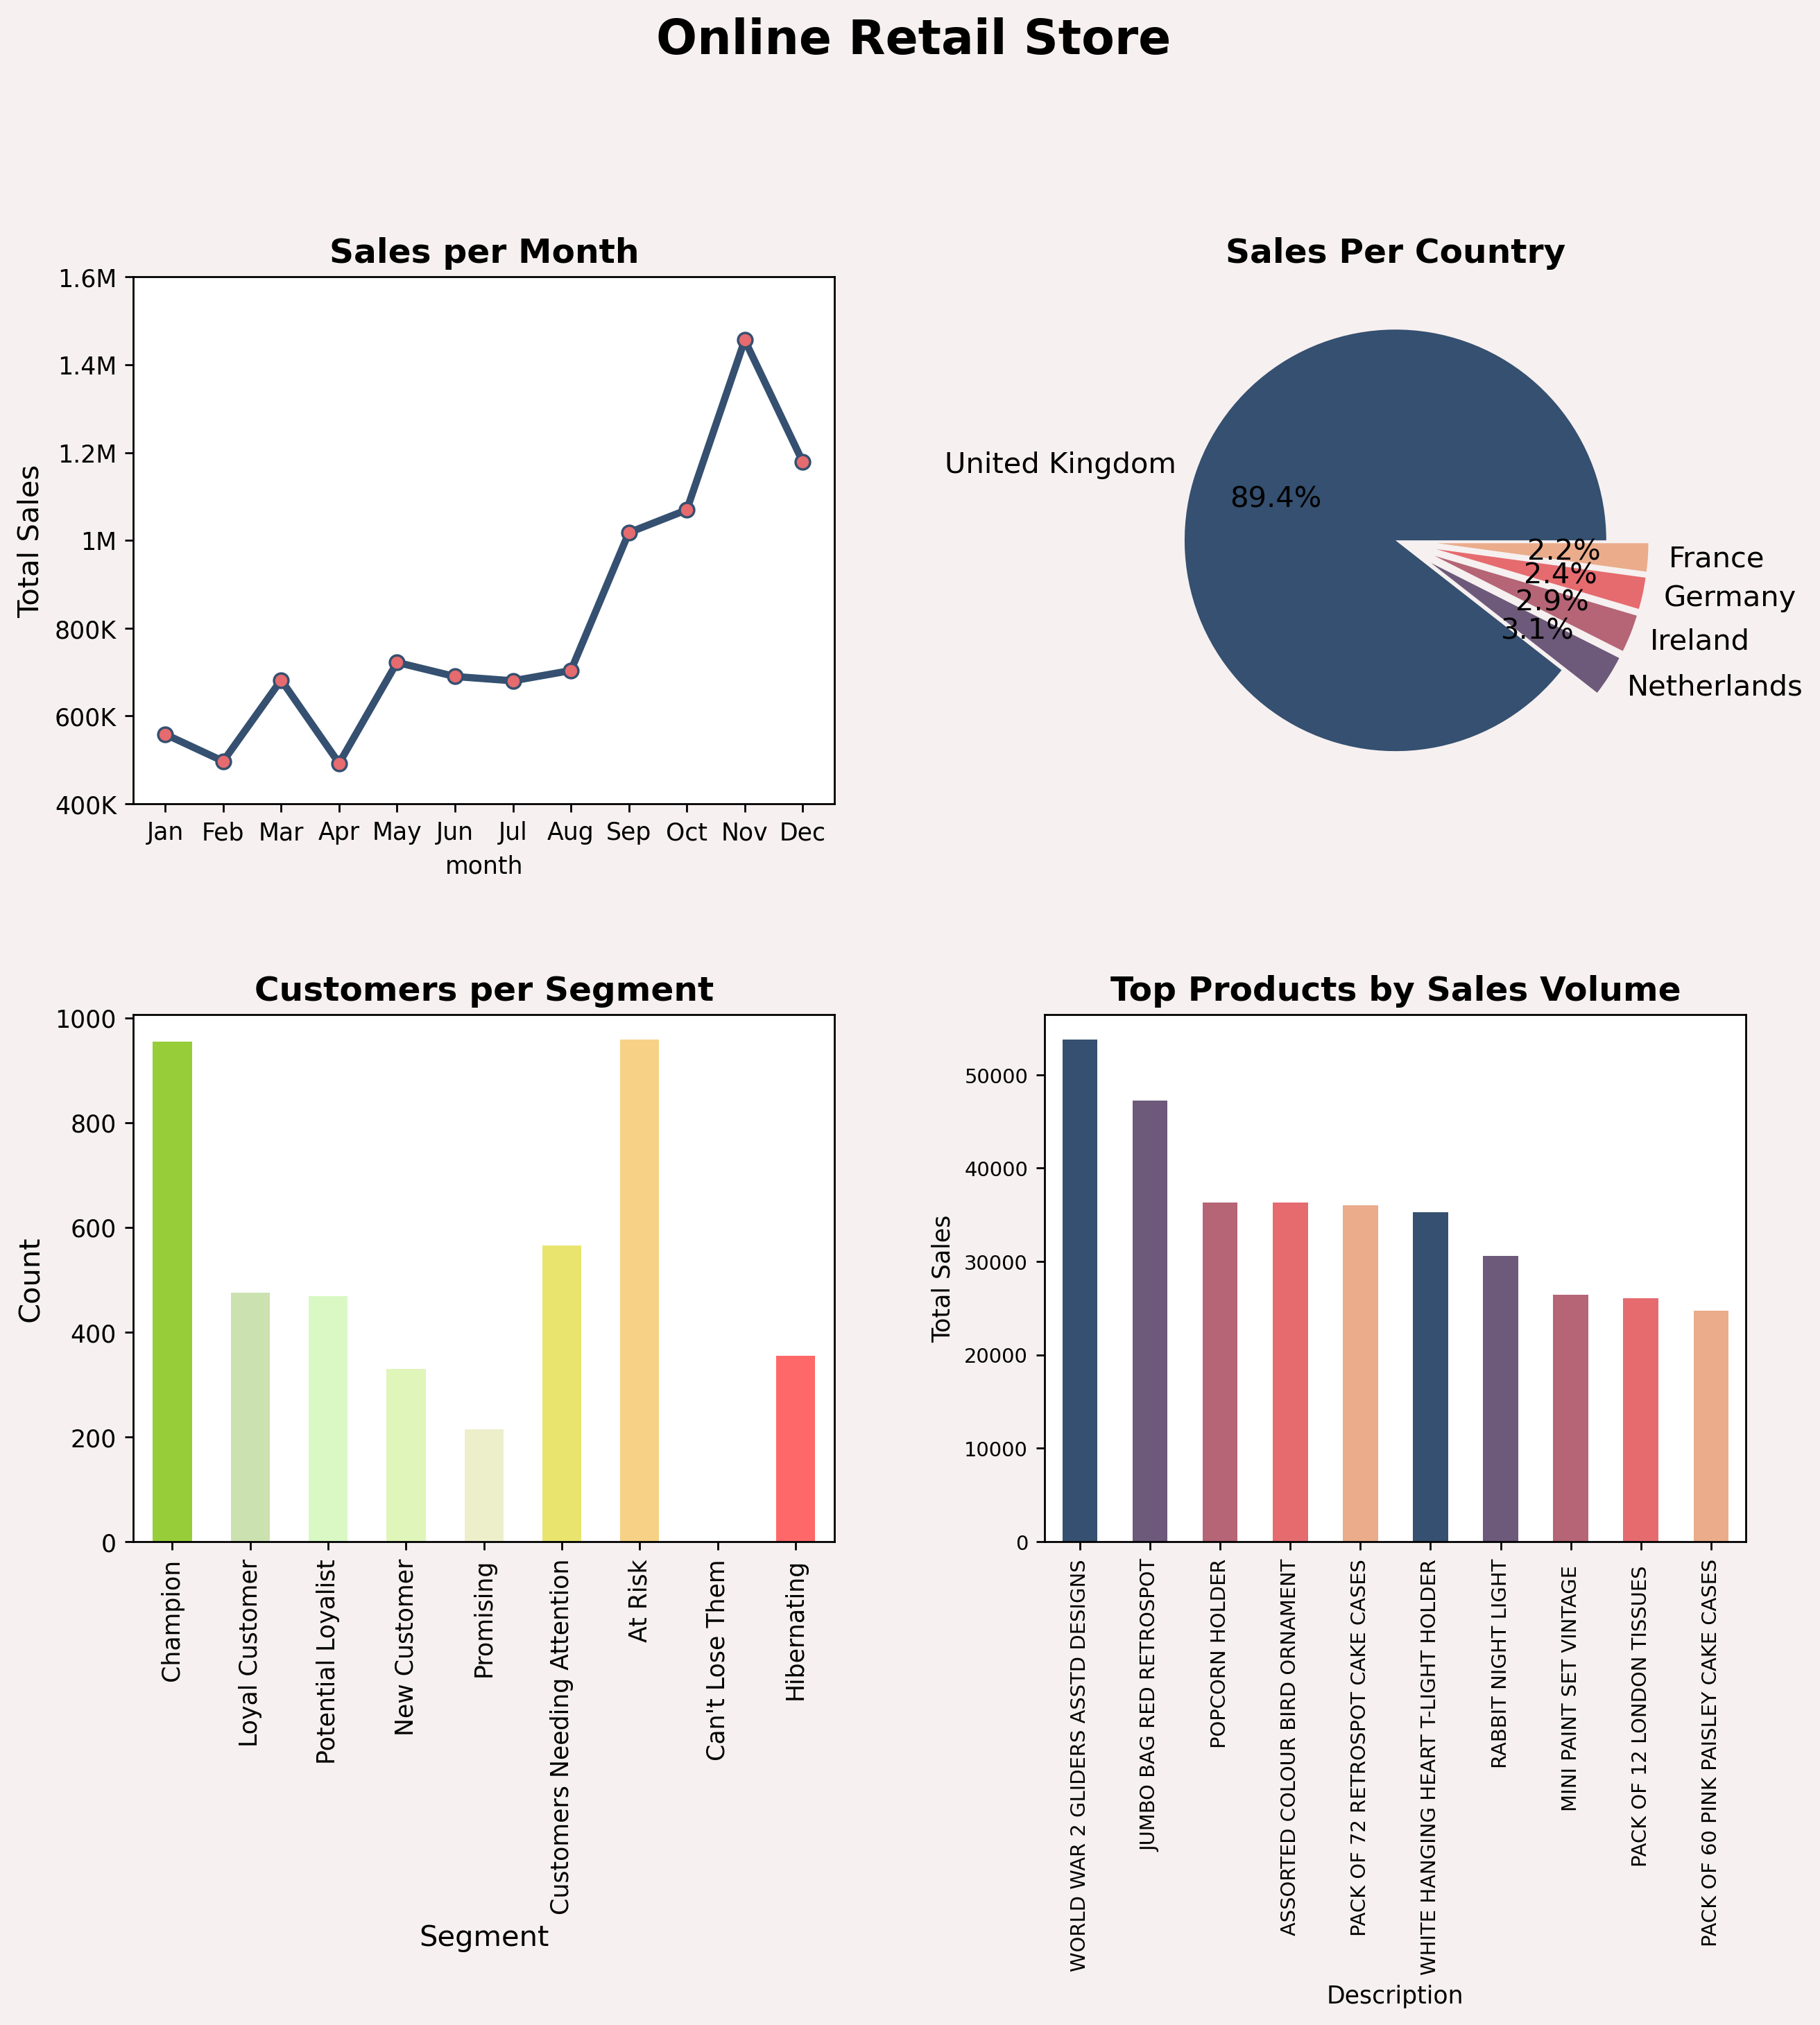

In [32]:
#Dashboard

plt.figure(figsize=(12,15),dpi=250,facecolor='#F6F0F0')
plt.suptitle("Online Retail Store",fontsize=20,fontweight='bold')
colors = ["#355070", "#6d597a", "#b56576", "#e56b6f", "#eaac8b"]

#Sales Over Time
plt.subplot(3,2,1)
plt.title("Sales per Month",fontsize=14, fontweight='bold')
retail.groupby("month")["Total Price"].sum().plot(kind= 'line', color= colors[0],linewidth=3,marker="o",markerfacecolor=colors[3])
plt.ylabel("Total Sales", fontsize=12)
plt.yticks([400_000,600_000,800_000,1_000_000, 1_200_000, 1_400_000, 1_600_000], labels = ["400K","600K","800K", "1M", "1.2M", "1.4M", "1.6M"])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], labels= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


#Top 10 products by sale volume
plt.subplot(3,2,4)
plt.title("Top Products by Sales Volume",fontsize=14, fontweight='bold')
retail.groupby('Description')["Quantity"].sum().sort_values(ascending=False).head(10).plot(
    kind='bar',
    color=colors,
    ylabel='Total Sales',
    fontsize='small'
)

#Sales By Country

plt.subplot(3,2,2)
plt.title("Sales By Country",fontsize=14, fontweight='bold')
retail.groupby('Country')["Total Price"].sum().sort_values(ascending=False).head(5).plot(
    kind= 'pie', 
    colors= colors,
    explode=(0,0.2,0.2,0.2,0.2),
    autopct='%1.1f%%', 
    fontsize=12,
    )
plt.title("Sales Per Country",fontsize=14, fontweight='bold')
plt.ylabel("")


#RFM Segmentation

plt.subplot(3,2,3)
segment_ranking = [
    "Champion",          # Most valuable
    "Loyal Customer",
    "Potential Loyalist",
    "New Customer",
    "Promising",
    "Customers Needing Attention",
    "At Risk",           
    "Can't Lose Them",
    "Hibernating"      # Least valuable
]
segment_colors = {
    "Champion": "#96CD39",         
    "Loyal Customer": "#CBE2B0",
    "Potential Loyalist": "#D9F8C4",
    "New Customer": "#E0F5B9",
    "Promising": "#ECEFCA",
    "Customers Needing Attention": "#E8E46E",
    "At Risk": "#F6D186",    
    "Can't Lose Them": "#FCB454",
    "Hibernating": "#FF6868"
}

segment_counts = rfm['Segment'].value_counts()
segment_counts = segment_counts.reindex(segment_ranking)  # Reorder based on ranking

ordered_colors = [segment_colors[seg] for seg in segment_counts.index]

segment_counts.plot.bar(color=ordered_colors)
plt.title("Customers per Segment", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Segment", fontsize=12)


plt.subplots_adjust(hspace=0.4, wspace=0.3)